# LAB: (quasi-) Newton methods

Author : Alexandre Gramfort

The objective of this lab session is to implement:
- Newton method
- DFP
- BFGS
and compare your implementation with the BFGS and L-BFGS solvers in scipy


# Part 0: Demo using Gradient descent

First import the necessary libraries:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

/Users/benjaminmuller/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Now import the necessary function from the optim_utils.py file.

In [15]:
from optim_utils import test_solver

You'll have work only with the `test_solver` function.

This function expects a function as parameter.

The signature of the function `optimizer` to pass should be the following:

`optimizer(x0, f, f_grad, f_hessian)`

Let us now make an example with a gradient descent.

In [6]:
def gradient_descent(x0, f, f_grad, f_hessian=None):

    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    for k in range(1, max_iter + 1):

        grad_x = f_grad(x)

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              -grad_x, grad_x,
                                                              c1=c1, c2=c2)
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        x -= step * grad_x

        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break

    return np.array(all_x_k), np.array(all_f_k)

Now I can call the `test_solver` function with this solver:


Running solver on case 1
iter: 1, f: 0.187228, l_inf_norm(grad): 0.35904
iter: 2, f: 0.0522931, l_inf_norm(grad): 0.162853
iter: 3, f: 0.020076, l_inf_norm(grad): 0.110187
iter: 4, f: 0.00874399, l_inf_norm(grad): 0.0745522
iter: 5, f: 0.00395127, l_inf_norm(grad): 0.050442
iter: 6, f: 0.00180287, l_inf_norm(grad): 0.0341291
iter: 7, f: 0.000824643, l_inf_norm(grad): 0.0230917
iter: 8, f: 0.000377432, l_inf_norm(grad): 0.0156239
iter: 9, f: 0.000172774, l_inf_norm(grad): 0.0105711
iter: 10, f: 7.90929e-05, l_inf_norm(grad): 0.00715241
iter: 11, f: 3.62076e-05, l_inf_norm(grad): 0.00483932
iter: 12, f: 1.65754e-05, l_inf_norm(grad): 0.00327429
iter: 13, f: 7.588e-06, l_inf_norm(grad): 0.00221538
iter: 14, f: 3.47369e-06, l_inf_norm(grad): 0.00149893
iter: 15, f: 1.59021e-06, l_inf_norm(grad): 0.00101417
iter: 16, f: 7.2798e-07, l_inf_norm(grad): 0.00068619
iter: 17, f: 3.3326e-07, l_inf_norm(grad): 0.000464276
iter: 18, f: 1.52562e-07, l_inf_norm(grad): 0.000314129
iter: 19, f: 6.98411

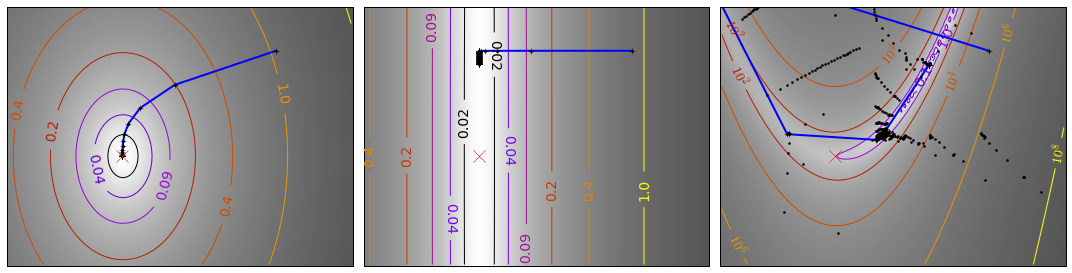

In [7]:
test_solver(gradient_descent)

# Part 2: Implement Newton method

You now need to implement Newton method using either `linalg.solve` or `sparse.linalg.cg` solve the linear system at each iteration. You need to implement both versions.

You're expected to comment in a few lines what you see.

In [8]:
import scipy.linalg as linalg

def newton(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    for k in range(1, max_iter + 1):

        grad_x = f_grad(x)
        print grad_x
        
        
        ####################################
        # Compute here the search direction
        # d = ...
        ####################################
        #x=np.linalg.solve(f_hessian,grad_x-np.dot(f_hessian,x))
        d=-np.linalg.solve(f_hessian(x),grad_x)

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
        print 'step'
        print step
        
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        x+=d

        ##################################
        # Compute here the new value of x
        # x = ...
        ##################################

        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break

    return np.array(all_x_k), np.array(all_f_k)


import scipy.linalg as linalg
import scipy.sparse.linalg as sp

def newton_sparse(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    for k in range(1, max_iter + 1):

        grad_x = f_grad(x)
        
        
        d=-sp.cg(f_hessian(x),grad_x)[0] #the output is a tuple so we need to take the 0. 
        
        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
        print 'step'
        print step
        
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        x+=d

    
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1
[ 1.056    0.35574]
step
1.0
iter: 1, f: 0, l_inf_norm(grad): 0

Running solver on case 2
[  1.05600000e+00   2.90400000e-04]
step
1.0
iter: 1, f: 0, l_inf_norm(grad): 0

Running solver on case 3
[ 935.6 -292. ]
step
1.0
iter: 1, f: 0.357547, l_inf_norm(grad): 1.19858
[  1.19858478e+00  -8.38681872e-04]
step
0.258055327995
iter: 2, f: 0.253454, l_inf_norm(grad): 14.6168
[ 142.85169391  -71.38957461]
step
1.0
iter: 3, f: 2.44184e-07, l_inf_norm(grad): 0.000988318
[  9.88318320e-04  -9.58242374e-09]
step
1.0
iter: 4, f: 5.96257e-12, l_inf_norm(grad): 9.76735e-05
[  9.76735278e-05  -4.88367591e-05]
step
1.0
iter: 5, f: 4.93038e-32, l_inf_norm(grad): 4.44089e-16


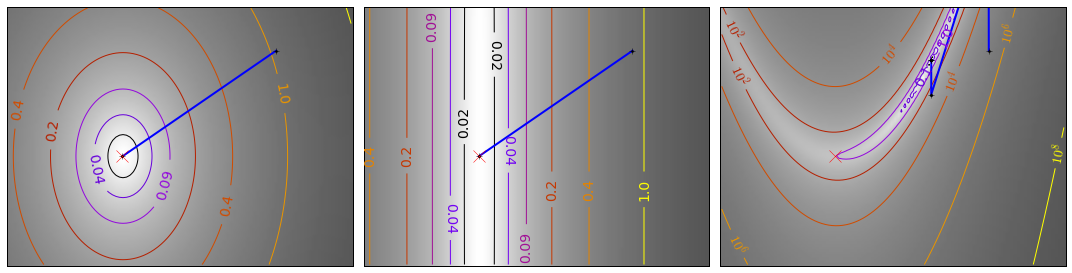


Running solver on case 1
step
1.0
iter: 1, f: 0, l_inf_norm(grad): 0

Running solver on case 2
step
1.0
iter: 1, f: 1.3327e-25, l_inf_norm(grad): 4.19424e-13

Running solver on case 3
step
1.0
iter: 1, f: 0.357547, l_inf_norm(grad): 1.19858
step
0.258055327995
iter: 2, f: 0.253454, l_inf_norm(grad): 14.6168
step
1.0
iter: 3, f: 2.44184e-07, l_inf_norm(grad): 0.000988318
step
1.0
iter: 4, f: 5.96257e-12, l_inf_norm(grad): 9.76735e-05
step
1.0
iter: 5, f: 4.93038e-32, l_inf_norm(grad): 4.44089e-16


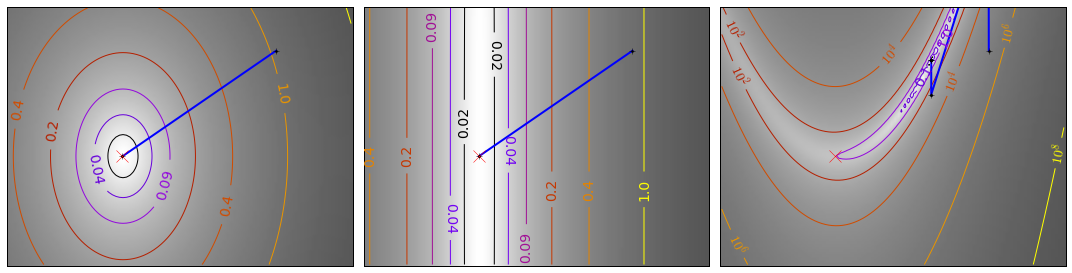

In [9]:
test_solver(newton)
test_solver(newton_sparse)

#### Your comments here

Dans les deux premiers cas, la fonction testée est une fonction quadratique. Comme prévu théoriquement, la convergence se fait en une itération quelque soit la forme de la fonction quadratique. 
Dans le troisième cas, on a affaire a fonction gaussienne. L'algorithme converge en 5 itérations. On confirme dans ce cas l'ordre de grandeur, dans un cas quelconque, que si l'on part d'un x0 assez proche la convergence (convergence quadratique) se fait en environ 10 itérations.

# Part 2: Implement DFP algorithm

You now need to implement the DFP algorithm.

In [10]:
def dfp(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.95
    max_iter = 200
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    B = np.eye(len(x))  # inverse Hessian approximation
    
    for k in range(1, max_iter + 1):       
        
        grad_x = f_grad(x)
        d=-np.dot(B,grad_x)

        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
        
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step

        s=step*d    
        x+=s
        y=f_grad(x)-grad_x
        B+=np.dot(s[:,None],s[None,:])/np.dot(s,y)-np.dot(B.dot(y)[:,None],y.dot(B)[None,:])/np.dot(y,B.dot(y))
        
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break
            
        grad_x = new_grad

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1
iter: 1, f: 0.187228, l_inf_norm(grad): 0.35904
iter: 2, f: 0.0214911, l_inf_norm(grad): 0.114753
iter: 3, f: 0.00899657, l_inf_norm(grad): 0.069501
iter: 4, f: 0.00023476, l_inf_norm(grad): 0.0175216
iter: 5, f: 1.76801e-05, l_inf_norm(grad): 0.00465113
iter: 6, f: 3.20353e-08, l_inf_norm(grad): 0.000140183
iter: 7, f: 1.32183e-10, l_inf_norm(grad): 8.99094e-06
iter: 8, f: 8.82459e-15, l_inf_norm(grad): 1.04309e-07

Running solver on case 2
iter: 1, f: 0.0978185, l_inf_norm(grad): 0.35904
iter: 2, f: 0.000159508, l_inf_norm(grad): 0.000290207
iter: 3, f: 0.000138677, l_inf_norm(grad): 0.000270594
iter: 4, f: 1.92681e-07, l_inf_norm(grad): 0.000503909
iter: 5, f: 1.4273e-07, l_inf_norm(grad): 0.000433799
iter: 6, f: 3.512e-14, l_inf_norm(grad): 1.6706e-08

Running solver on case 3
iter: 1, f: 104.123, l_inf_norm(grad): 700.972
iter: 2, f: 7.56575, l_inf_norm(grad): 24.138
iter: 3, f: 7.34339, l_inf_norm(grad): 4.87789
iter: 4, f: 7.29892, l_inf_norm(grad): 8.4

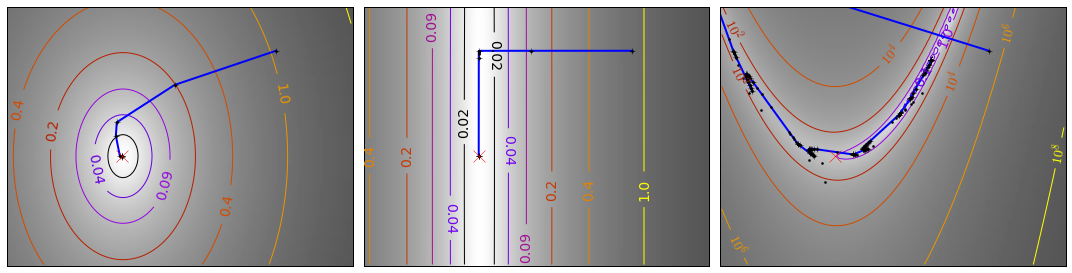

In [11]:
test_solver(dfp)

Contrairement à l'algorithme de Newton exacte, on perd la convergence en 1 itérations pour les fonctions quadratiques. 
Pour les fonctions plus complexes, la convergence est elle aussi plus lente. 
On observe toutefois ici la convergence en n itérations environs comme la théorie le prédit dans le cas quadratique.

# Part 3: Implement BFGS algorithm

You now need to implement the BFGS algorithm.

In [12]:
def bfgs(x0, f, f_grad, f_hessian):
    default_step = 0.01
    c1 = 0.0001
    c2 = 0.9
    max_iter = 100
    
    # This variable is used to indicate whether or not we want to print
    # monitoring information (iteration counter, function value and norm of the gradient)
    verbose = True

    all_x_k, all_f_k = list(), list()
    x = x0

    all_x_k.append(x.copy())
    all_f_k.append(f(x))

    H = np.eye(len(x))  # Hessian approximation
    
    grad_x = f_grad(x)
    
    for k in range(1, max_iter + 1):       
        
        ####################################
        # Compute here the search direction
        # d = ...
        ####################################
        grad_x = f_grad(x)
        C=np.linalg.cholesky(H)
       
        d1=linalg.solve(C,grad_x)
        d2=linalg.solve(np.transpose(C),d1)
        
        d=-d2
        
        # Compute a step size using a line_search to satisfy the
        # strong Wolfe conditions
        step, _, _, new_f, _, new_grad = optimize.line_search(f, f_grad, x,
                                                              d, grad_x,
                                                              c1=c1, c2=c2)
                
        
        if step is None:
            print("Line search did not converge at iteration %s" % k)
            step = default_step
        
        
        x+=step*d
        s=step*d
        y=f_grad(x)-grad_x
        H+=np.dot(y[:,None],y[None,:])/np.dot(s,y)-np.dot(H.dot(s)[:,None],s.dot(H)[None,:])/np.dot(s,H.dot(s))
        
        
        all_x_k.append(x.copy())
        all_f_k.append(new_f)

        l_inf_norm_grad = np.max(np.abs(new_grad))

        if verbose:
            print('iter: %d, f: %.6g, l_inf_norm(grad): %.6g' %
                  (k, new_f, l_inf_norm_grad))

        if l_inf_norm_grad < 1e-6:
            break
            
        grad_x = new_grad

    return np.array(all_x_k), np.array(all_f_k)


Running solver on case 1
iter: 1, f: 0.187228, l_inf_norm(grad): 0.35904
iter: 2, f: 0.0209281, l_inf_norm(grad): 0.11324
iter: 3, f: 0.00806831, l_inf_norm(grad): 0.0656686
iter: 4, f: 3.9809e-05, l_inf_norm(grad): 0.00723054
iter: 5, f: 4.69973e-07, l_inf_norm(grad): 0.000735419
iter: 6, f: 7.22702e-11, l_inf_norm(grad): 6.78586e-06
iter: 7, f: 2.47614e-14, l_inf_norm(grad): 1.18656e-07

Running solver on case 2
iter: 1, f: 0.0978185, l_inf_norm(grad): 0.35904
iter: 2, f: 0.000159508, l_inf_norm(grad): 0.000290207
iter: 3, f: 0.000119306, l_inf_norm(grad): 0.00025098
iter: 4, f: 6.91982e-13, l_inf_norm(grad): 9.54949e-07

Running solver on case 3
iter: 1, f: 104.123, l_inf_norm(grad): 700.972
iter: 2, f: 7.59071, l_inf_norm(grad): 26.034
iter: 3, f: 7.34411, l_inf_norm(grad): 4.87129
iter: 4, f: 7.29555, l_inf_norm(grad): 8.30631
iter: 5, f: 6.98403, l_inf_norm(grad): 49.3631
iter: 6, f: 6.72314, l_inf_norm(grad): 26.9831
iter: 7, f: 6.31556, l_inf_norm(grad): 14.5499
iter: 8, f: 5.

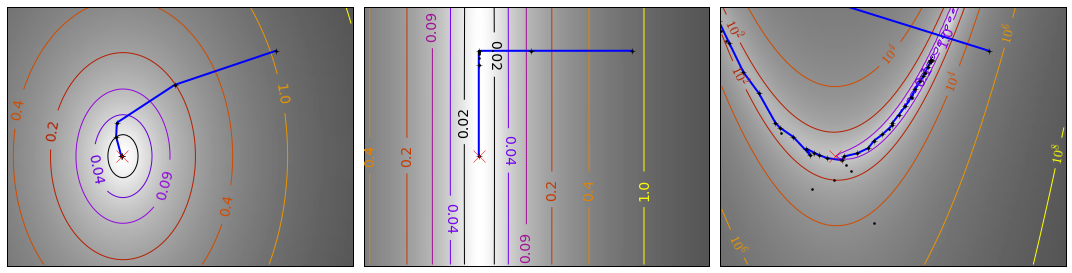

In [13]:
test_solver(bfgs)

#### Your comments here
On remarque que contrairement aux DFS, le BFGS est moins sensible quand on utilise un step approché. 
En effet, le nombre d'itération reste similaire quand on modifie le step. 

# Part 4: Do the same now with scipy implementation of BFGS and L-BFGS

In [14]:
from scipy.optimize import fmin_bfgs, fmin_l_bfgs_b

def mk_quad(epsilon, ndim=2):
    def f(x):
        x = np.asarray(x)
        y = x.copy()
        y *= np.power(epsilon, np.arange(ndim))
        return .33 * np.sum(y**2)

    def f_prime(x):
        x = np.asarray(x)
        y = x.copy()
        scaling = np.power(epsilon, np.arange(ndim))
        y *= scaling
        return .33 * 2 * scaling * y

    def hessian(x):
        scaling = np.power(epsilon, np.arange(ndim))
        return .33 * 2 * np.diag(scaling ** 2)

    return f, f_prime, hessian


from scipy.optimize import rosen as rosenbrock
from scipy.optimize import rosen_der as rosenbrock_prime
from scipy.optimize import rosen_hess as rosenbrock_hessian

from scipy.optimize import fmin_bfgs, fmin_l_bfgs_b

def modified_fmin_bfgs(x0, f, f_grad, f_hessian):
    all_x_k, all_f_k = fmin_bfgs(f, x0, f_grad,retall=True)
    return np.array(all_x_k), np.array(all_f_k)

f1,f2,f3 = mk_quad(.02)
x_start = np.array([1.6, 1.1])

xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflag, alivecs = fmin_bfgs(f1, x_start, f2, full_output=True, retall=True)
print(alivecs)par

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 19
         Gradient evaluations: 19
[array([ 1.6,  1.1]), array([ 0.544    ,  1.0997096]), array([ -1.20919669e-07,   1.09926972e+00]), array([ -1.20204696e-04,   9.50683455e-01]), array([ -7.97874296e-05,   6.27134964e-01]), array([ -2.35418466e-09,  -7.35204342e-10])]
